In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

train = train.append(test[test.x_exit==test.x_exit])
    
x_train = train.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
x_test = test2.drop(columns=['hash','trajectory_id','x_exit','y_exit'])



y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [4]:
test2[:10]

,hash,trajectory_id,time_entry,time_exit,vmean,x_entry,y_entry,x_exit,y_exit,x_req,y_req,len,time
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,54212,54632,0.0,3.773118e+06,-1.914490e+07,NaN,NaN,3.773385e+06,-1.911344e+07,5,420
1,000479418b5561ab694a2870cc04fd43_25,traj_000479418b5561ab694a2870cc04fd43_25_10,55749,55856,0.0,3.769978e+06,-1.934136e+07,NaN,NaN,3.771380e+06,-1.933274e+07,3,107
2,000506a39775e5bca661ac80e3f466eb_29,traj_000506a39775e5bca661ac80e3f466eb_29_5,55568,55568,0.0,3.757468e+06,-1.923860e+07,NaN,NaN,3.755349e+06,-1.916135e+07,3,0
3,0005401ceddaf27a9b7f0d42ef1fbe95_1,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,56118,56525,0.0,3.760505e+06,-1.935500e+07,NaN,NaN,3.751349e+06,-1.916284e+07,3,407
4,00063a4f6c12e1e4de7d876580620667_3,traj_00063a4f6c12e1e4de7d876580620667_3_4,53647,54314,0.0,3.766319e+06,-1.917013e+07,NaN,NaN,3.776264e+06,-1.918289e+07,4,667
5,0006535be25bb52dd06983447880c964_5,traj_0006535be25bb52dd06983447880c964_5_12,55326,55326,0.0,3.776037e+06,-1.916993e+07,NaN,NaN,3.769801e+06,-1.935089e+07,6,0
6,0006f84bb33ec929d1cda7686f861d0a_31,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,54012,54012,0.0,3.760009e+06,-1.923361e+07,NaN,NaN,3.759835e+06,-1.924379e+07,4,0
7,00093ae562586aed0e053b8431e8ace4_23,traj_00093ae562586aed0e053b8431e8ace4_23_10,57189,57189,0.0,3.756665e+06,-1.914692e+07,NaN,NaN,3.756680e+06,-1.914717e+07,4,0
8,000c739e444a70e1804d757a0580caaa_31,traj_000c739e444a70e1804d757a0580caaa_31_3,56491,56491,0.0,3.768082e+06,-1.922134e+07,NaN,NaN,3.768081e+06,-1.922126e+07,3,0
9,000d479078af08618bddc7f09082b8c3_11,traj_000d479078af08618bddc7f09082b8c3_11_6,53886,54220,0.0,3.766505e+06,-1.920176e+07,NaN,NaN,3.744812e+06,-1.932195e+07,5,334


In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

columns=['x_entry','y_entry']
data=train[columns]
trainend=np.shape(data)[0]
data=data.append(test[columns])
testend=np.shape(data)[0]
data=data.append(test2[columns])



c = DBSCAN(eps=200,
            min_samples=40,
            n_jobs=-1
            ).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
test_c=c[trainend:testend]
test2_c=c[testend:]




In [6]:
clusters

1782

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


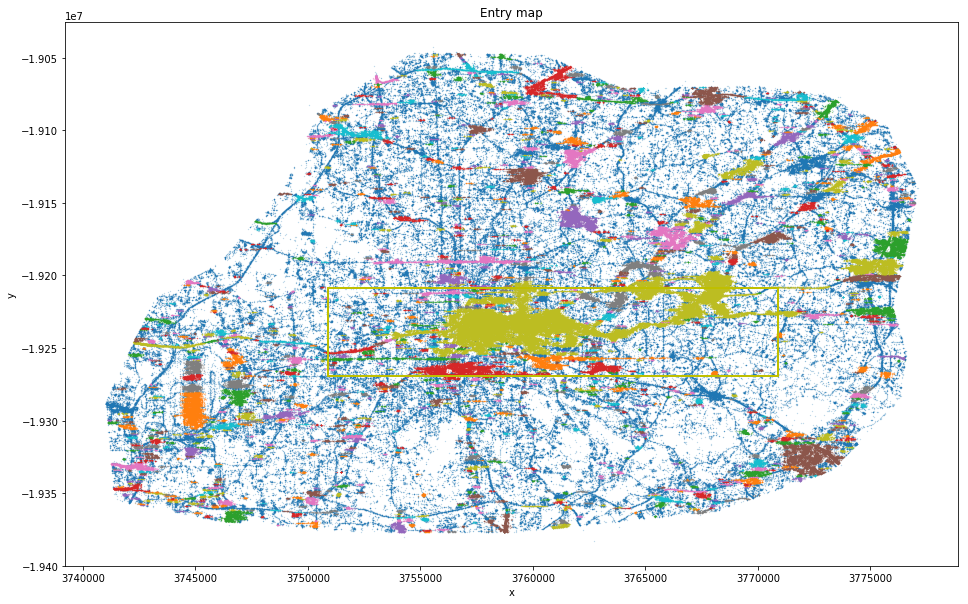

In [7]:
data=train[columns]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


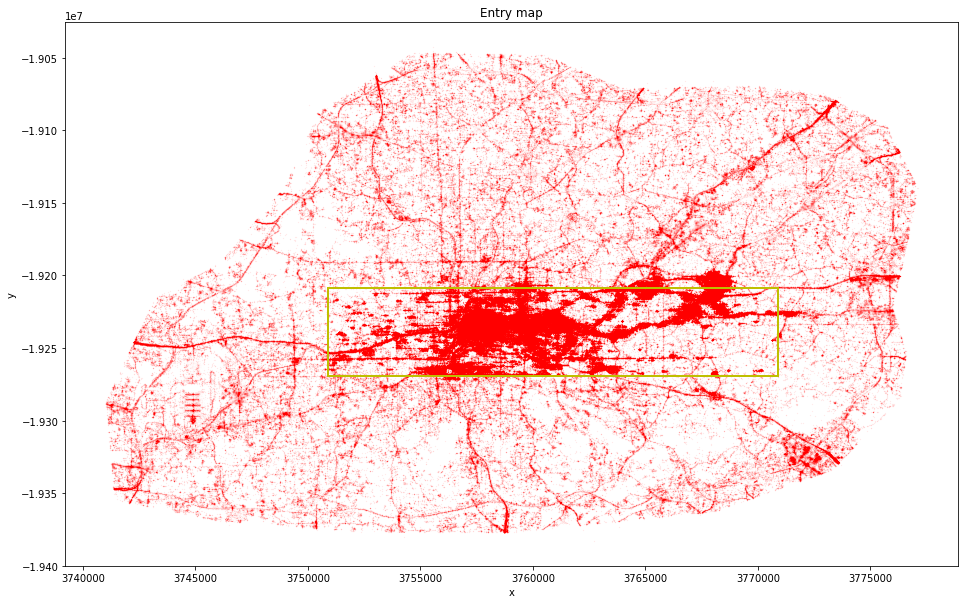

In [8]:

proba=[]
for c in labels:
    mean = np.mean(y_train[train_c==c].y)
    mean= mean #+ (0.2*(1-mean))
    proba.append(mean)
c_proba = pd.DataFrame({'c':labels,'proba':proba})



data=train[columns]

#train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

In [9]:
import lightgbm as lgb

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_leaves' : 50,
    #'feature_fraction': 0.64, 
    #'bagging_fraction': 0.8, 
    #'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss',
    'min_data':1  ,
    'min_data_in_bin':1,
    #'min_data_in_leaf':,
    'num_threads':8
}


def naklastry():
    pred = pd.DataFrame({'c':test2_c,'target':test2_c})
    for c in labels:
        xc_train=x_train[train_c==c]
        yc_train=y_train[train_c==c].y.values
        xc_test=x_test[test2_c==c]
        if len(xc_test)==0:
            continue
        print(len(xc_train),len(xc_test))
        d_train = lgb.Dataset(xc_train, label=yc_train)
        clf = lgb.train(params, d_train)
        #Prediction
        target=list(clf.predict(xc_test))

        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target

        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
        print('done:',c)
    return pred.target.values

def jedna():
    d_train = lgb.Dataset(x_train, label=y_train.y.values)
    clf = lgb.train(params, d_train)
    #Prediction
    target=list(clf.predict(x_test))
    print('done:',c)    
    return target
  
        
city_lgbm_proba=naklastry()   

296090 9039
done: -1
24875 1138
done: 0
347 17
done: 1
747 26
done: 2
2127 77
done: 3
2127 63
done: 4
6640 260
done: 5
2469 74
done: 6
212598 7306
done: 7
278 6
done: 8
210 7
done: 9
154 1
done: 10
9410 440
done: 11
15102 475
done: 12
640 19
done: 13
5781 218
done: 14
71 2
done: 15
780 16
done: 16
295 8
done: 17
1702 73
done: 18
2845 114
done: 19
2466 91
done: 20
3075 118
done: 21
141 10
done: 22
1824 67
done: 23
18011 653
done: 24
3043 108
done: 25
707 21
done: 26
530 17
done: 27
1127 39
done: 28
101 4
done: 29
2090 81
done: 30
1466 47
done: 31
55 3
done: 32
12429 481
done: 33
6898 242
done: 34
1063 38
done: 35
724 26
done: 36
14227 581
done: 37
4376 155
done: 38
355 12
done: 39
764 27
done: 40
936 21
done: 41
6029 223
done: 42
567 14
done: 43
122 4
done: 44
64 4
done: 45
533 21
done: 46
2787 79
done: 47
597 6
done: 48
678 25
done: 49
592 25
done: 50
132 6
done: 51
208 2
done: 52
2467 84
done: 53
173 4
done: 54
570 29
done: 55
413 13
done: 56
600 19
done: 57
35 2
done: 58
645 18
done:

done: 518
93 2
done: 519
1319 35
done: 520
460 14
done: 521
75 4
done: 522
129 6
done: 523
65 1
done: 524
73 1
done: 525
114 6
done: 527
362 9
done: 528
127 4
done: 529
57 3
done: 530
51 2
done: 531
61 2
done: 533
110 2
done: 534
180 4
done: 535
137 9
done: 536
560 30
done: 537
80 1
done: 538
55 2
done: 539
153 2
done: 540
161 11
done: 541
62 1
done: 542
330 16
done: 543
121 1
done: 544
102 6
done: 545
119 3
done: 546
41 1
done: 547
62 1
done: 548
257 15
done: 549
62 1
done: 550
255 14
done: 551
59 5
done: 552
148 3
done: 553
83 2
done: 555
127 6
done: 556
116 7
done: 557
227 4
done: 559
59 2
done: 560
203 10
done: 561
88 4
done: 563
62 3
done: 564
55 1
done: 565
92 2
done: 566
40 1
done: 567
58 4
done: 568
101 7
done: 569
50 1
done: 570
67 1
done: 571
80 6
done: 572
138 7
done: 573
53 1
done: 574
33 1
done: 575
168 10
done: 576
98 4
done: 577
115 2
done: 578
121 8
done: 579
58 3
done: 580
47 3
done: 581
193 7
done: 582
57 1
done: 583
59 4
done: 584
98 3
done: 585
56 3
done: 586
122 2


done: 1108
41 2
done: 1109
61 2
done: 1110
80 2
done: 1111
67 2
done: 1112
38 1
done: 1113
50 1
done: 1114
69 3
done: 1115
57 1
done: 1116
64 1
done: 1118
96 1
done: 1119
76 3
done: 1120
108 4
done: 1121
57 3
done: 1122
85 1
done: 1126
61 2
done: 1127
36 1
done: 1129
55 1
done: 1131
46 1
done: 1134
46 2
done: 1135
116 2
done: 1136
139 3
done: 1138
75 7
done: 1139
39 2
done: 1140
57 1
done: 1141
60 2
done: 1142
94 2
done: 1143
152 4
done: 1145
89 3
done: 1146
38 2
done: 1147
38 1
done: 1148
70 3
done: 1149
80 3
done: 1150
29 3
done: 1151
91 4
done: 1153
66 3
done: 1154
30 1
done: 1155
34 2
done: 1156
40 1
done: 1157
57 1
done: 1158
72 3
done: 1159
135 2
done: 1160
64 1
done: 1161
58 1
done: 1163
61 2
done: 1164
124 6
done: 1165
39 1
done: 1166
35 1
done: 1170
55 1
done: 1172
251 7
done: 1173
46 2
done: 1174
47 1
done: 1175
47 1
done: 1176
77 3
done: 1177
60 3
done: 1178
60 2
done: 1179
78 3
done: 1180
57 2
done: 1181
88 5
done: 1182
64 3
done: 1183
49 1
done: 1184
62 4
done: 1185
21 1
d

done: 1768
25 2
done: 1769
31 2
done: 1770
17 2
done: 1771
30 2
done: 1773
32 1
done: 1774
26 1
done: 1775
34 1
done: 1777
15 1
done: 1778
19 1
done: 1779
22 3
done: 1780


In [10]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

def score(x):
    if x>0.5:
        return 1
    else:
        return 0

city_proba_proba=[c_proba[c_proba.c==x]['proba'].values[0] for x in test2_c]  
    
city_sqrt = [within_measure(x, y) for x,y in zip(X,Y)]
city_proba= [score(x) for x in city_proba_proba]
city_lgbm = [score(x) for x in city_lgbm_proba]


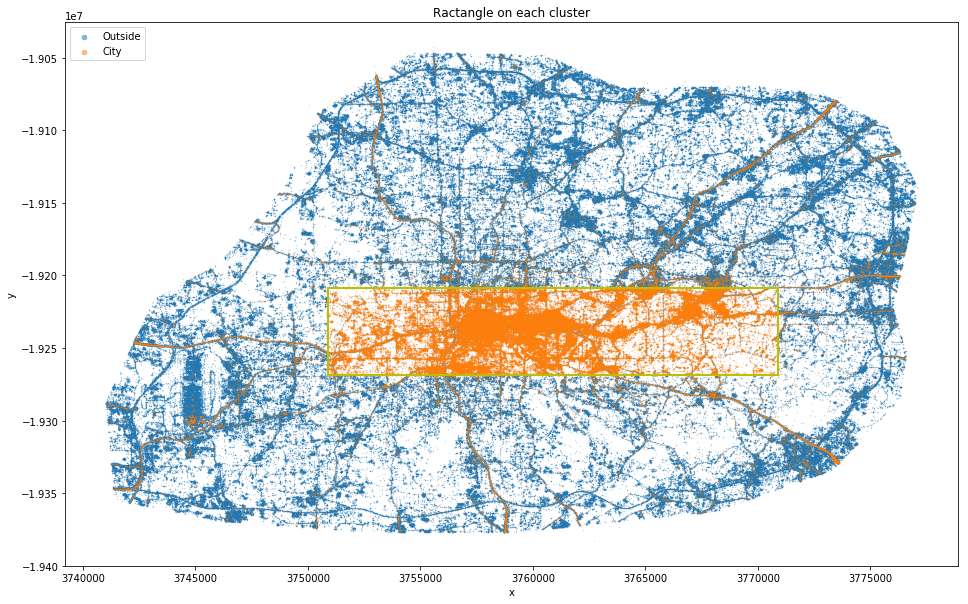

In [11]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



leg=['Outside','City']
# Plot
for data in [train[y_train.y.values==0],train[y_train.y.values==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Ractangle on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


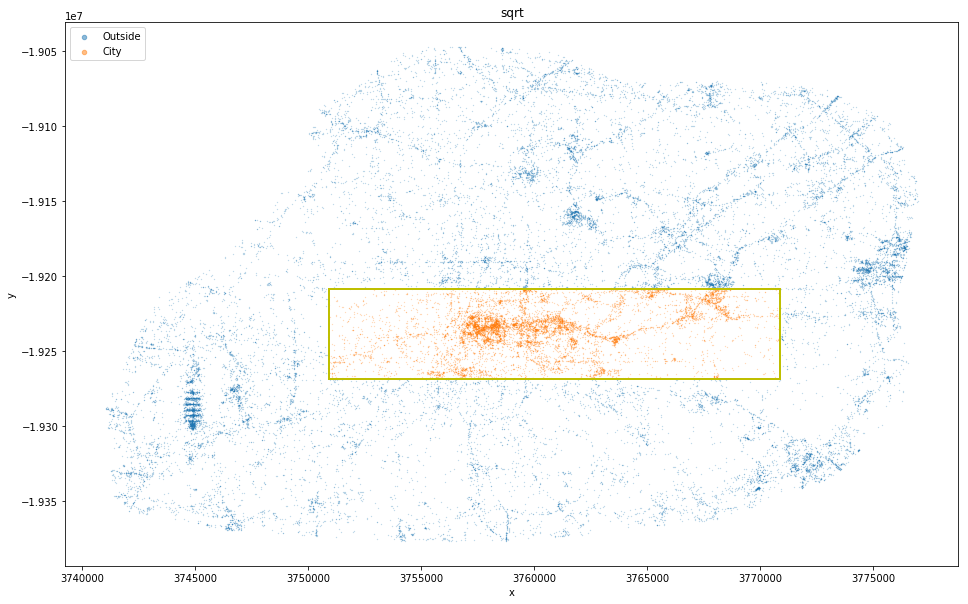

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_sqrt

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='sqrt')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


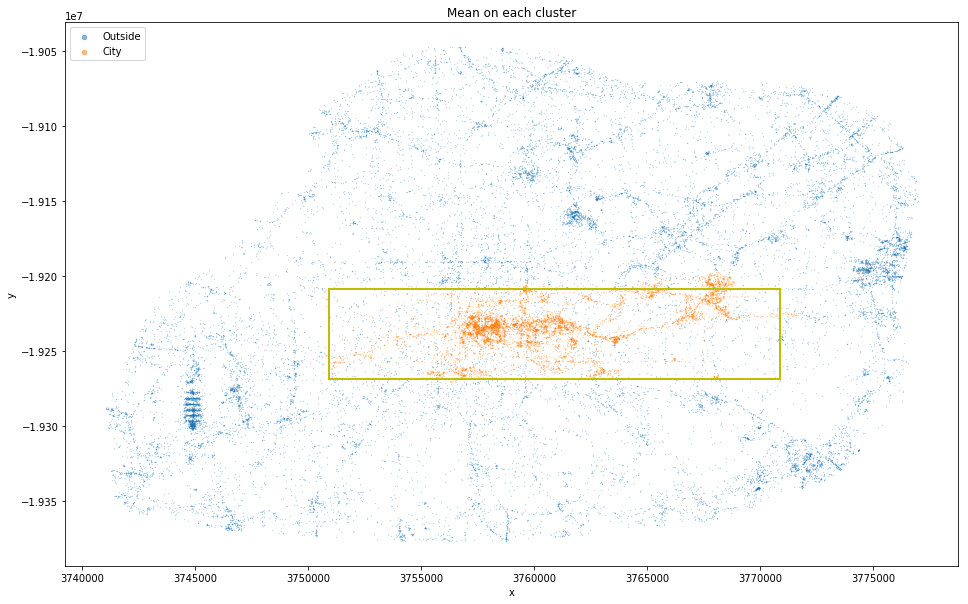

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_proba

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Mean on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


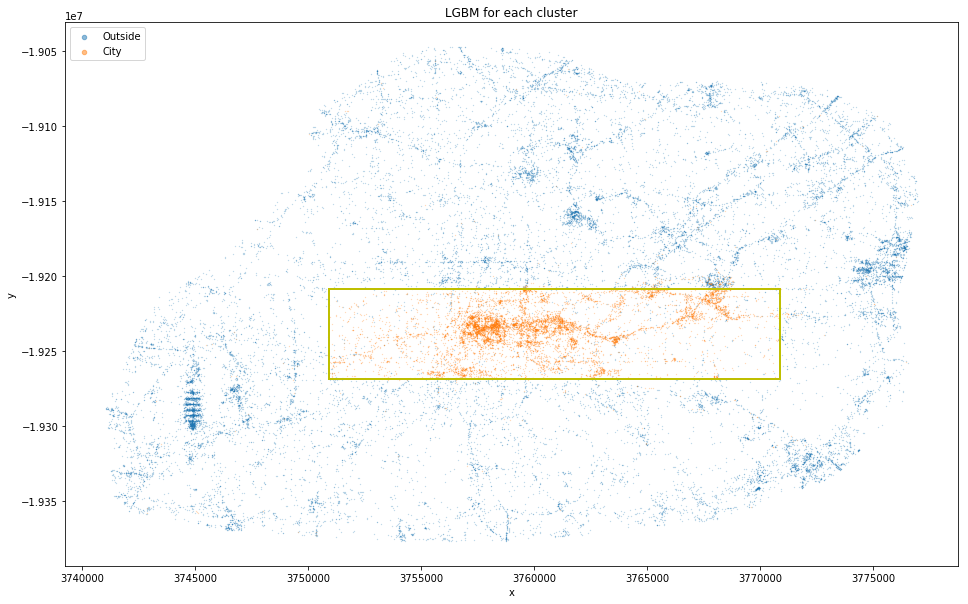

In [14]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city_lgbm

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM for each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


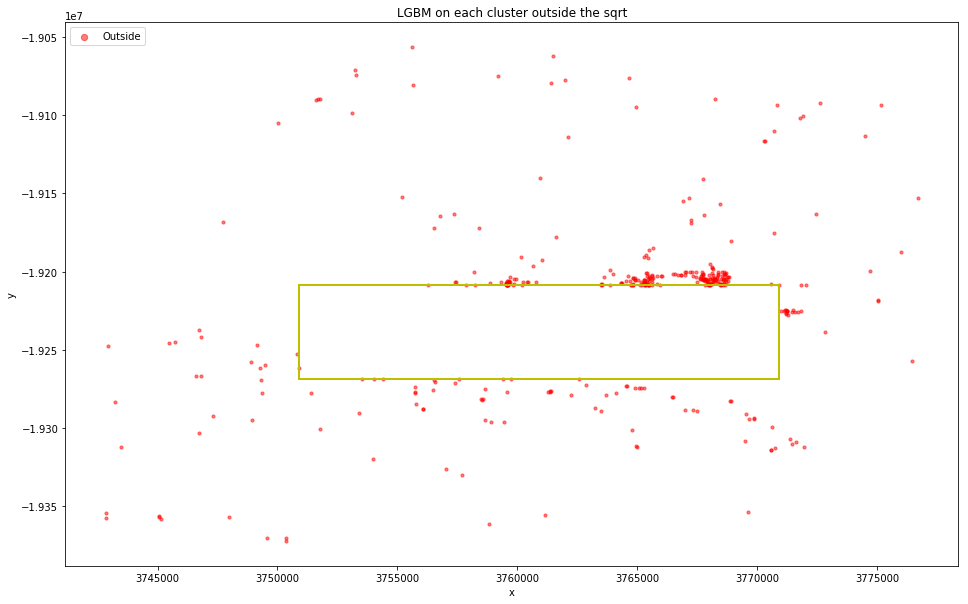

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city_lgbm
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM on each cluster outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


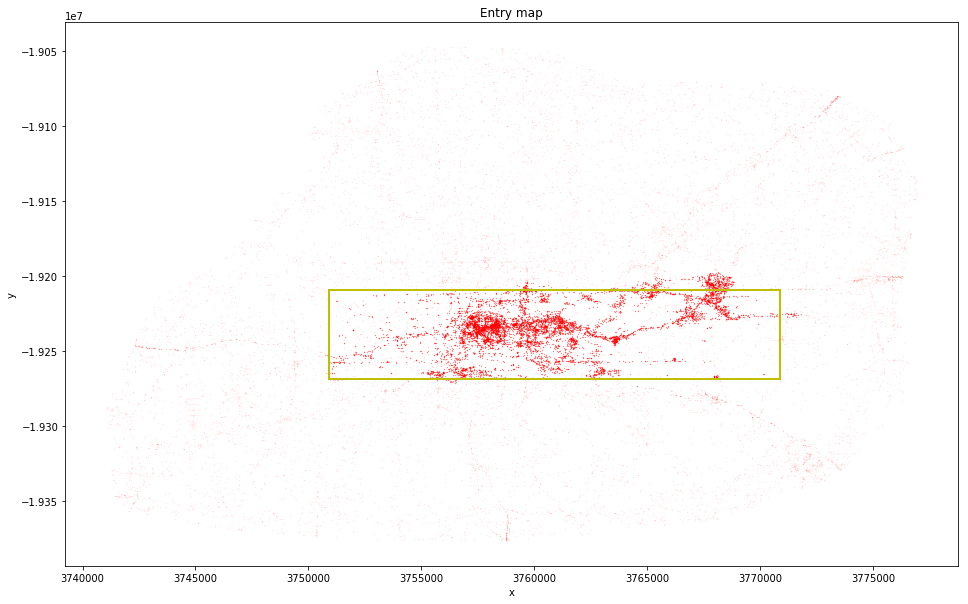

In [16]:
data=test2[['x_entry','y_entry']]


#train_c=kmeans.predict(data)
data['c']=test2_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

In [17]:
import statistics


#city = [score(statistics.mean(k)) for k in zip(city_proba_proba,city_lgbm_proba)]
city = [score(statistics.mean(k)) for k in zip(city_proba_proba,city_lgbm_proba)]


submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city_lgbm
submission.to_csv('./output/mlgbm.csv',index=False)    
submission[:20]

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0
5,traj_0006535be25bb52dd06983447880c964_5_12,0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,1
9,traj_000d479078af08618bddc7f09082b8c3_11_6,1


In [18]:
submission['target'] = city_proba
submission.to_csv('./output/mproba.csv',index=False)    
submission[:20]

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0
5,traj_0006535be25bb52dd06983447880c964_5_12,0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,1
9,traj_000d479078af08618bddc7f09082b8c3_11_6,1


In [19]:
submission['target'] = city
submission.to_csv('./output/mcity.csv',index=False)    
submission[:20]

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0
5,traj_0006535be25bb52dd06983447880c964_5_12,0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,1
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,1
9,traj_000d479078af08618bddc7f09082b8c3_11_6,1


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


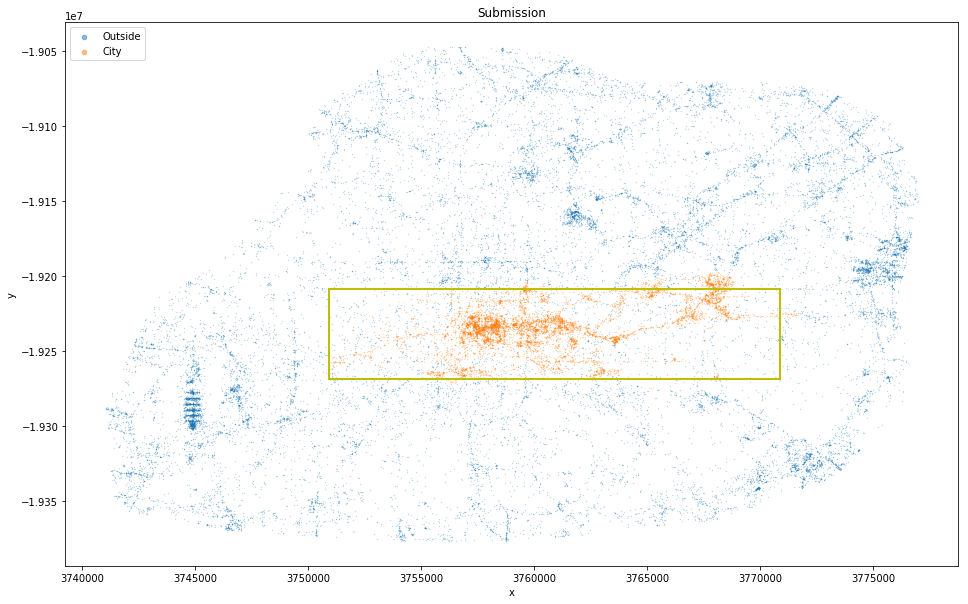

In [20]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['target']=city

leg=['Outside','City']
# Plot
for data in [df[df.target==0],df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Submission')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


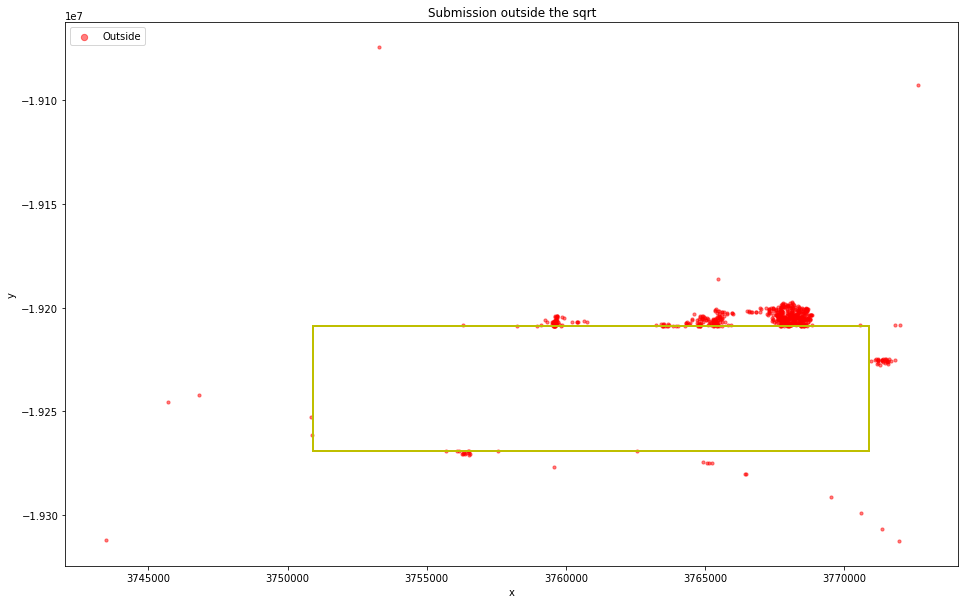

In [21]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

df=test2[['x_entry','y_entry']]
df['sqrt']=city_sqrt
df['target']=city
df=df[df.sqrt==0]
leg=['Outside','City']
# Plot
for data in [df[df.target==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=10,c='r', alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Submission outside the sqrt')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()